In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO 8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df.drop(columns=[ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.rename(columns={'v1':'Labels','v2':'Messages'},inplace=True)

In [8]:
df.head()

,Labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
for i in range(10):
    print(df['Messages'][i])
    print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more?

In [10]:
df['Labels'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
df.isna().sum()

Labels      0
Messages    0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    5169 non-null   object
 1   Messages  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [15]:
df.duplicated().sum()

0

In [16]:
df['Labels'].value_counts()

ham     4516
spam     653
Name: Labels, dtype: int64

<AxesSubplot:xlabel='Labels', ylabel='count'>

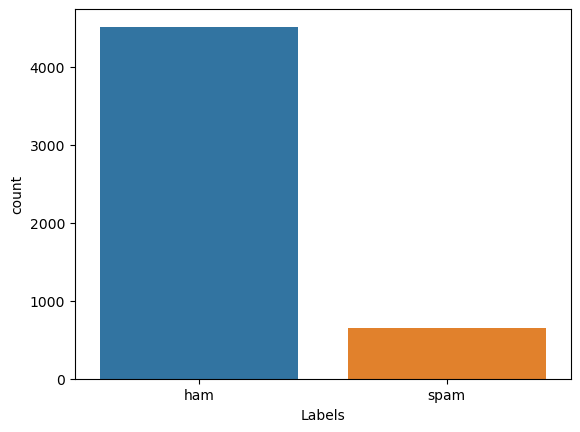

In [17]:
sns.countplot(data=df,x='Labels')

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [19]:
def preprocess(sentence):
    
    text=re.sub(r"[^0-9A-Za-z]",' ',sentence).split()
    
    text=[i.lower() for i in text if i not in stopwords.words('english')]
    
    lemma=WordNetLemmatizer()
    text=[lemma.lemmatize(i,'v') for i in text]
    
    return ' '.join(text)

In [20]:
df['Messages']=df['Messages'].apply(preprocess)

In [21]:
for i in range(10):
    print(df['Messages'][i])
    print()

go jurong point crazy available bugis n great world la e buffet cine get amore wat

ok lar joke wif u oni

free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate t c apply 08452810075over18

u dun say early hor u c already say

nah i think go usf live around though

freemsg hey darling 3 week word back i like fun still tb ok xxx std chgs send 1 50 rcv

even brother like speak they treat like aid patent

as per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune

winner as value network customer select receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours

have mobile 11 months u r entitle update latest colour mobiles camera free call the mobile update co free 08002986030



In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv=CountVectorizer()

In [24]:
x=cv.fit_transform(df['Messages']).toarray()

In [26]:
x.shape

(5169, 7620)

In [27]:
def label(i):
    if i=='ham':
        return 1
    else:
        return 0

In [28]:
y=df['Labels'].apply(label)

In [29]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Labels, Length: 5169, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model=RandomForestClassifier()

In [34]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
model.score(x_train,y_train)

1.0

In [36]:
predicted=model.predict(x_test)

In [37]:
predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
accuracy_score(y_test,predicted)

0.9729206963249516

<AxesSubplot:>

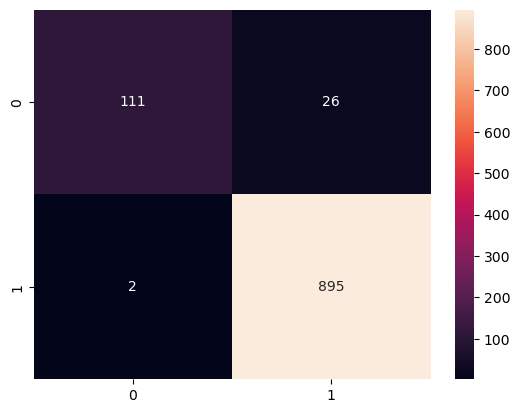

In [40]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [42]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       137
           1       0.97      1.00      0.98       897

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

